## Mount Google Drive

In [1]:
# mount images 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.applications.densenet import preprocess_input
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D, BatchNormalization
from keras import layers, Model
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam
import matplotlib
from matplotlib import pyplot as plt
import keras
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

## Data Visualization

Text(0.5, 1.0, 'Number of Training images per Class:')

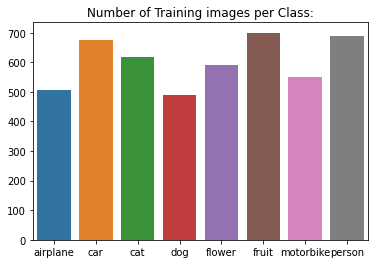

In [27]:
train_data_dir = "/content/drive/My Drive/Thesis_Natural_Images/Dataset/Train"
val_data_dir = "/content/drive/My Drive/Thesis_Natural_Images/Dataset/Validation/"
test_data_dir = "/content/drive/My Drive/Thesis_Natural_Images/Dataset/Test/"
class_names = sorted(os.listdir(train_data_dir))

train_img_cat = []
val_img_cat = []
test_img_cat = []
for classes in class_names:
    train_folder = train_data_dir + '/' + classes
    train_img_cat.append(len(os.listdir(train_folder)))

for classes in class_names:
    val_folder = val_data_dir + '/' + classes
    val_img_cat.append(len(os.listdir(val_folder)))

for classes in class_names:
    test_folder = test_data_dir + '/' + classes
    test_img_cat.append(len(os.listdir(test_folder)))

sns.barplot(x=class_names, y=train_img_cat).set_title("Number of Training images per Class:")

Text(0.5, 1.0, 'Number of Validation images per Class:')

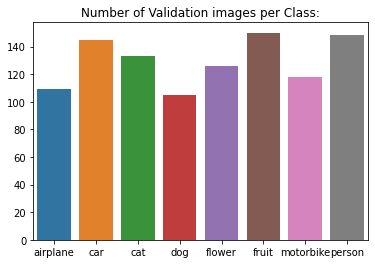

In [28]:
sns.barplot(x=class_names, y=val_img_cat).set_title("Number of Validation images per Class:")

Text(0.5, 1.0, 'Number of Testing images per Class:')

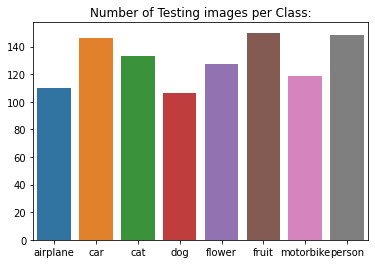

In [29]:
sns.barplot(x=class_names, y=test_img_cat).set_title("Number of Testing images per Class:")

## Data Preprocessing

### Dara Augmentation

In [30]:
# pre processing using keras - flow from directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator(rescale=1.0/255) # normalising

train = generator.flow_from_directory('/content/drive/My Drive/Thesis_Natural_Images/Dataset/Train/',target_size=(256,256), class_mode='categorical', batch_size=64, shuffle=False)
val = generator.flow_from_directory('/content/drive/My Drive/Thesis_Natural_Images/Dataset/Validation/', target_size=(256,256), class_mode='categorical', batch_size=64, shuffle=False)
test = generator.flow_from_directory('/content/drive/My Drive/Thesis_Natural_Images/Dataset/Test/', target_size=(256,256), class_mode='categorical', batch_size=64, shuffle=False)

Found 4826 images belonging to 8 classes.
Found 1034 images belonging to 8 classes.
Found 1039 images belonging to 8 classes.


## Applying Transfer learning - 
### VGG16 (Visual Geometry Group from Oxford)

In [31]:
VGG16Model = VGG16(include_top=False, input_shape=(256,256,3), classes = 8)

In [32]:
# get feature from pre-trained model
train_feature = VGG16Model.predict(train)
var_feature = VGG16Model.predict(val)

from keras.utils import to_categorical
# get classes
train_target = to_categorical(train.labels)
var_target = to_categorical(val.labels)

In [36]:
var_target

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

## Model Summary

In [34]:
VGG16Model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

## Fitting the model

In [37]:
VggModel = Sequential()
VggModel.add(Flatten()) # input_shape = (8,8,512)
VggModel.add(Dense(100, activation='relu'))
VggModel.add(Dropout(0.25))
VggModel.add(BatchNormalization())
VggModel.add(Dense(8, activation='softmax'))

# compile the model
VggModel.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# train model using features generated from VGG16 model
result = VggModel.fit(train_feature, train_target, epochs=10, validation_data=(var_feature, var_target))

Epoch 1/10
151/151 [==============================] - 8s 51ms/step - loss: 0.2570 - accuracy: 0.9354 - val_loss: 0.0975 - val_accuracy: 0.9787
Epoch 2/10
151/151 [==============================] - 8s 50ms/step - loss: 0.0592 - accuracy: 0.9901 - val_loss: 0.0710 - val_accuracy: 0.9807
Epoch 3/10
151/151 [==============================] - 8s 51ms/step - loss: 0.0301 - accuracy: 0.9959 - val_loss: 0.0724 - val_accuracy: 0.9797
Epoch 4/10
151/151 [==============================] - 8s 51ms/step - loss: 0.0157 - accuracy: 0.9990 - val_loss: 0.0506 - val_accuracy: 0.9816
Epoch 5/10
151/151 [==============================] - 8s 51ms/step - loss: 0.0098 - accuracy: 0.9994 - val_loss: 0.0508 - val_accuracy: 0.9874
Epoch 6/10
151/151 [==============================] - 8s 50ms/step - loss: 0.0101 - accuracy: 0.9990 - val_loss: 0.0588 - val_accuracy: 0.9787
Epoch 7/10
151/151 [==============================] - 8s 50ms/step - loss: 0.0075 - accuracy: 0.9996 - val_loss: 0.0470 - val_accuracy: 0.9836

## Testing

In [38]:
test_feature = VGG16Model.predict(test)
test_classes = to_categorical(test.labels)

In [40]:
VggModel.evaluate(test_feature, test_classes )

33/33 [==============================] - 0s 9ms/step - loss: 0.0550 - accuracy: 0.9798


[0.05495041608810425, 0.9797882437705994]

## Model Evaluation

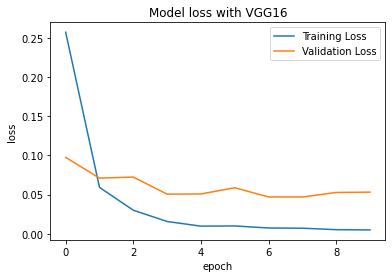

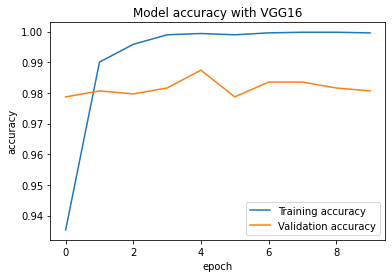

In [41]:
# Plot.py
plt.plot(result.history['loss'], label='Training Loss')
plt.plot(result.history['val_loss'], label='Validation Loss')
plt.title('Model loss with VGG16')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

plt.plot(result.history['accuracy'], label='Training accuracy')
plt.plot(result.history['val_accuracy'], label='Validation accuracy')
plt.title('Model accuracy with VGG16')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

## Confusion Matrix

In [42]:
import itertools
import numpy as np


def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# V16 = keras.models.load_model('/content/drive/MyDrive/Thesis_Natural_Images/VggModel.h5')

In [43]:
#Confution Matrix and Classification Report

Y_pred = VggModel.predict(test_feature, 64)
y_pred = np.argmax(Y_pred, axis=1)
# print('Confusion Matrix')
# print(confusion_matrix(test_data.classes, y_pred))

In [44]:
cm = confusion_matrix(test.classes, y_pred)
cm_plot_labels = class_names
print(cm_plot_labels)

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']


Confusion matrix, without normalization
[[110   0   0   0   0   0   0   0]
 [  1 145   0   0   0   0   0   0]
 [  0   0 123   9   1   0   0   0]
 [  0   0   2 103   1   0   0   0]
 [  0   0   2   4 121   0   0   0]
 [  0   0   0   0   0 150   0   0]
 [  0   0   0   0   0   0 119   0]
 [  0   0   0   1   0   0   0 147]]
None


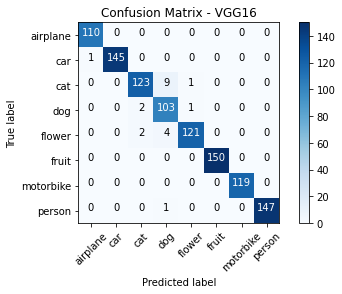

In [45]:
print(plot_confusion_matrix(cm, classes = cm_plot_labels, title='Confusion Matrix - VGG16', normalize=False))

## Classification Report

In [46]:
print('Classification Report - VGG16')
print(classification_report(test.classes, y_pred, target_names=class_names))

Classification Report - VGG16
              precision    recall  f1-score   support

    airplane       0.99      1.00      1.00       110
         car       1.00      0.99      1.00       146
         cat       0.97      0.92      0.95       133
         dog       0.88      0.97      0.92       106
      flower       0.98      0.95      0.97       127
       fruit       1.00      1.00      1.00       150
   motorbike       1.00      1.00      1.00       119
      person       1.00      0.99      1.00       148

    accuracy                           0.98      1039
   macro avg       0.98      0.98      0.98      1039
weighted avg       0.98      0.98      0.98      1039

